In [129]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error,r2_score)
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [64]:
# Definimos una función para graficar resultados de las regresiones lineales
def draw_lm_results(y_test_p, x_test_p, model):
    ref_p = np.linspace(min(y_test_p),max(y_test_p))
    y_predict_p = model.predict(x_test_p)
    fig = plt.figure(figsize=(10,8))
    plt.scatter(y_test_p,y_predict_p)
    plt.plot(ref_p,ref_p,'k--')
    plt.axis('square')
    plt.xlabel('y real'),plt.ylabel('y predict')
    mse_p = mean_squared_error(y_test_p,y_predict_p, squared=False)
    r2_p = r2_score(y_test_p,y_predict_p)
    plt.title(f"Linear regression (original), RMSE={mse_p:.10f}, R^2={r2_p:.10f}")
    plt.grid()
    plt.show()

In [115]:
x_column_names = {"Sector_score","PARA_A","Score_A",
                "Risk_A","PARA_B","Score_B","Risk_B","TOTAL",
                "numbers","Score_B.1","Risk_C","Money_Value",
                "Score_MV","Risk_D","District_Loss","PROB",
                "RiSk_E","History","Prob","Risk_F","Score",
                "Inherent_Risk","CONTROL_RISK","Detection_Risk"}
y_column_name = {"Audit_Risk"}
df_train = pd.read_csv("Audit_train.csv", index_col=0)
df_test = pd.read_csv("Audit_test.csv", index_col=0) # Idx 201-299 (se eliminaron manual 200 y 300)
df_unknown = pd.read_csv("Audit_unknown.csv", index_col=0) # 300-350

En los diagramas de cajas es posible observar que la escala es un problema. 

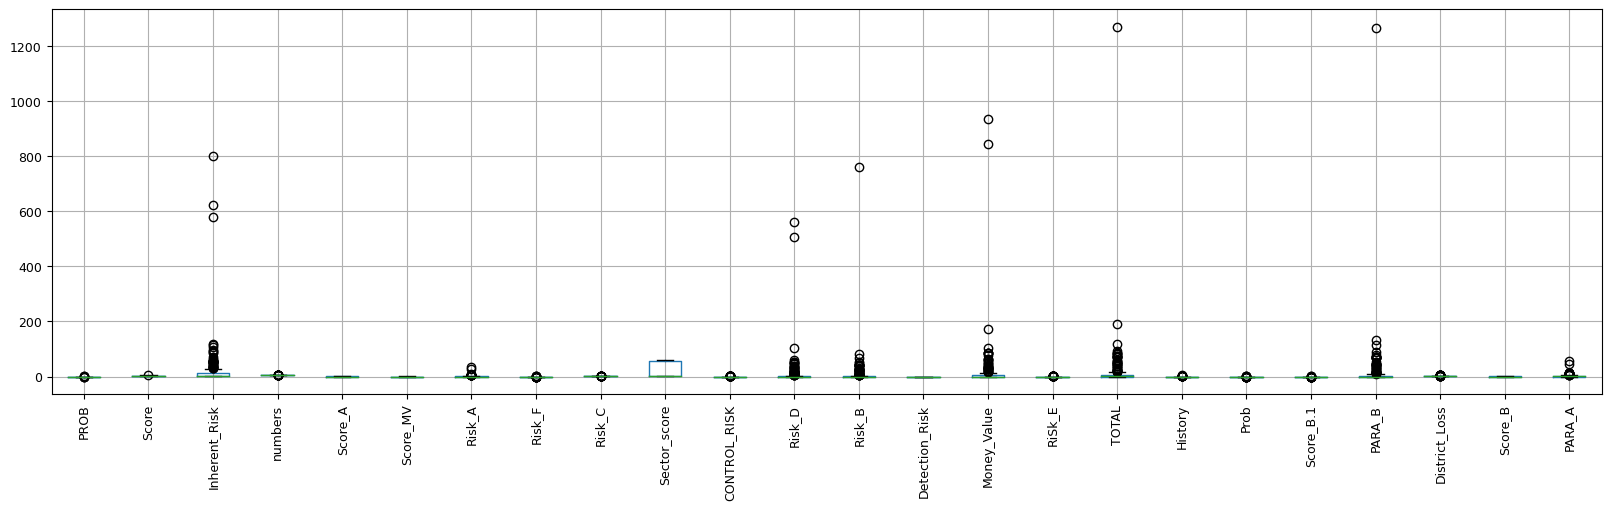

In [98]:
axes, boxplot_dict = pd.DataFrame.boxplot(df_train[x_column_names], return_type='both', fontsize=9, figsize=(20,5), rot=90)
plt.show()

Para proceder con las outliers y no afectar de forma significativa el set de datos, filtramos por los valores que son arriba de 150. 
Vemos que la columna 2 (Inherent_Risk) tiene 3 observaciones con estas características:

In [99]:
def filter_gt_umbral(array, umbral):
    '''
    greater than umbral
    '''
    return [element for element in array if element > umbral]

# Eliminación de outliers. Vamos primero por los valores arriba de 200
umbral = 150
outliers = [filter_gt_umbral(flier.get_ydata(),umbral)  for flier in boxplot_dict["fliers"]]
outliers

[[],
 [],
 [577.508, 801.262, 622.838],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [561.018, 506.622],
 [758.778],
 [],
 [935.03, 173.02, 844.37],
 [],
 [1268.91, 191.36],
 [],
 [],
 [],
 [1264.63],
 [],
 [],
 []]

In [100]:
outliers_inherent_risk = outliers[2]
df_train = df_train[~df_train.Inherent_Risk.isin(outliers_inherent_risk)]
# Resetear indices para evitar problemas en el PCA
df_train = df_train.reset_index(drop=True)
df_train.describe(include='all')

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.0,198.000000
mean,23.102778,2.146619,0.340404,1.165425,8.720952,0.317172,5.099221,10.847621,5.053030,0.220202,...,0.207071,0.494949,0.090909,0.215152,0.043434,2.683838,13.031612,0.538384,0.5,4.281237
std,25.514302,4.245281,0.171833,2.584356,19.967242,0.172200,12.018606,21.939335,0.184325,0.066805,...,0.046725,0.241557,0.441293,0.060226,0.245016,0.837958,23.103234,0.355438,0.0,8.872283
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000
25%,2.370000,0.217500,0.200000,0.043500,0.000000,0.200000,0.000000,0.490000,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.557500,0.400000,0.5,0.311500
50%,3.890000,0.780000,0.200000,0.156000,0.425000,0.200000,0.085000,1.260000,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,2.200000,2.207000,0.400000,0.5,0.511200
75%,55.570000,2.297500,0.600000,1.378500,3.497500,0.400000,1.741500,5.997500,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,3.200000,11.431500,0.400000,0.5,2.826300
max,59.850000,45.230000,0.600000,27.138000,113.970000,0.600000,68.382000,117.080000,6.500000,0.600000,...,0.600000,1.200000,5.000000,0.600000,3.000000,4.800000,118.850000,3.400000,0.5,52.012000


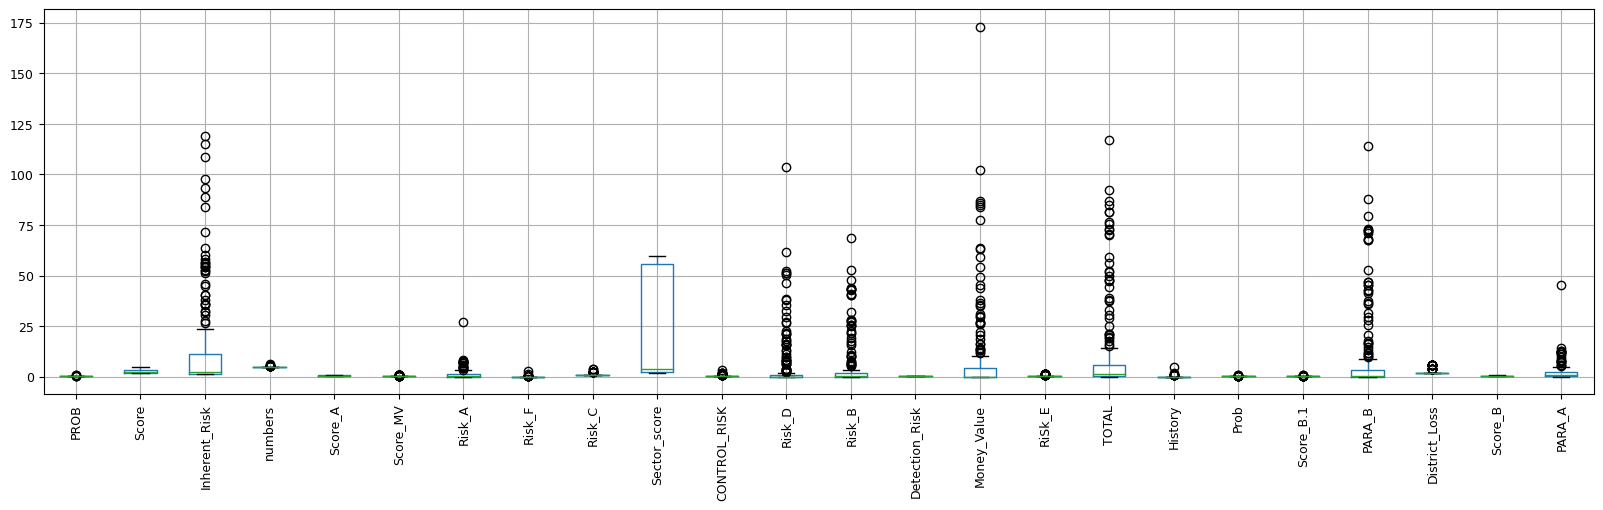

In [101]:
axes, boxplot_dict = pd.DataFrame.boxplot(df_train[x_column_names], return_type='both', fontsize=9, figsize=(20,5), rot=90)
plt.show()

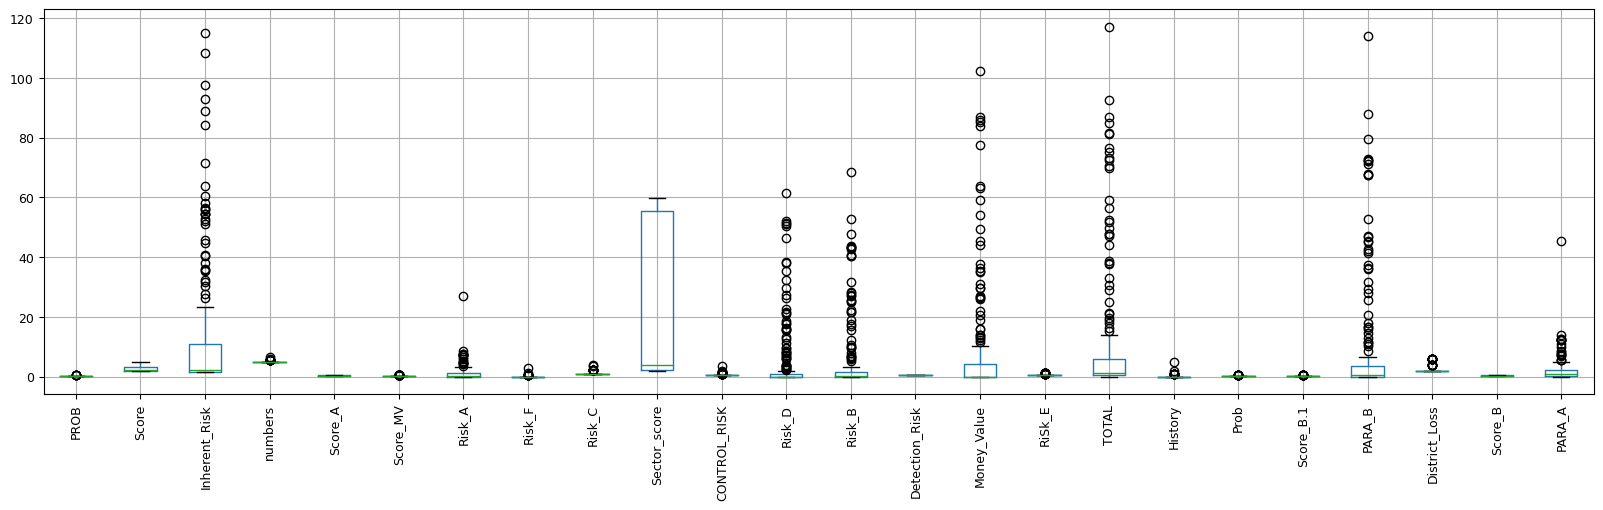

In [102]:
# Aún parecen quedar outliers en Money_Value. Repetimos el proceso, ahora con esa columna. 
outliers_money_value = outliers[14]
df_train = df_train[~df_train.Money_Value.isin(outliers_money_value)]
# Resetear indices para evitar problemas en el PCA
df_train = df_train.reset_index(drop=True)
axes, boxplot_dict = pd.DataFrame.boxplot(df_train[x_column_names], return_type='both', fontsize=9, figsize=(20,5), rot=90)
plt.show()


La escala sigue siendo un problema, a continuación se aborda primero los resultados del modelo sin escalar y luego el escalamiento. 

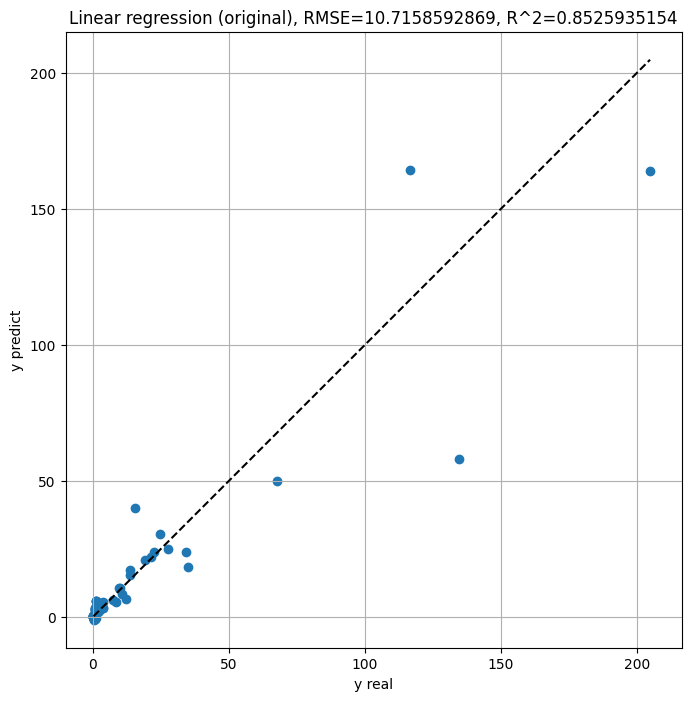

In [103]:
linreg_train = LinearRegression()
linreg_train.fit(df_train[x_column_names],np.array(df_train[y_column_name]))
draw_lm_results(np.array(df_test[y_column_name]), df_test[x_column_names], linreg_train)